In [1]:
import numpy as np
import utils as ut
from sklearn import linear_model as lm

In [2]:
X, Y = ut.read_data('data/boss_data.csv', x_cols=1)

# It is a good idea to print a few numbers to validate that data has been read correctly 

print(X[0:10])
print(Y[0:10])

[94.73767016 76.69259299 69.21264349 51.86989788 59.21872871 90.61935811
 56.69402161 96.58083996 79.47576554 56.4635164 ]
[315.39365089  82.22066993  59.90251473  44.9243945   47.72276803
 217.45087642  54.41364538 599.31139798 113.69582835  49.117597  ]


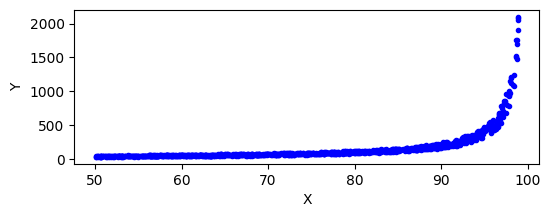

In [3]:
# It is a good idea to plot the data to see if we can figure out the relationships 
ut.plot_data(X,Y)

In [4]:
# This does not look like any kind of linear relationship, nor does it look like a polynomial one 
# Let us see if this is a exponential relationship -- plotting log Y against X and log X against Y 

In [5]:
log_Y = np.log(Y)
log_X = np.log(X)

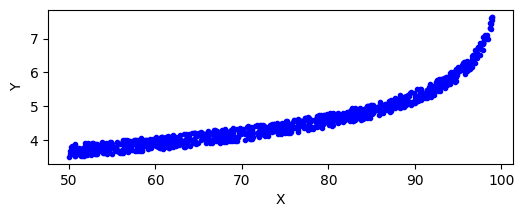

In [6]:
ut.plot_data(X,log_Y)

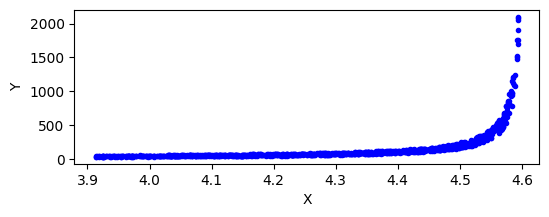

In [7]:
ut.plot_data(log_X, Y) 

In [8]:
# This does not look like an exponential relationship. Maybe there is an inverse dependency. 
# Let us try to plot the relationship of products of X and Y 

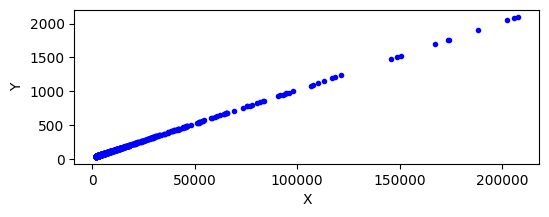

In [9]:
prod = np.multiply(X,Y)
ut.plot_data(prod,Y)

In [10]:
# Looks like we have found a linear relationship. We will do linear regression to determine XY, 
# Let us fit the curve of XY against Y and we will get the relationship 

model = lm.LinearRegression()
model.fit(prod.reshape(-1, 1), Y)
print(model.coef_)
print(model.intercept_)

model.score(prod.reshape(-1,1), Y)

[0.01001029]
19.927806071855514


0.9999083854679163

In [11]:
# Now we know the relationship is Y = XYs + a 
# Alternatively, we have Y = a/(1-Xs)
# Let us check how good the R2 score is 

s = model.coef_
a = model.intercept_

prediction = a/(1-s*X) 

from sklearn.metrics import r2_score
r2 = r2_score(prediction, Y)
print(r2)

0.9852390135787743
